In [64]:
import pickle
import configs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [37]:
# f = open('trainlogs/log_alloc_train_' + str(configs.n_jobs) + '_' + str(configs.n_machines) + '_' + str(configs.task_time_low) + '_' + str(configs.task_time_high)+'.pkl', 'rb')
# data = pickle.load(f)
# f.close()


In [74]:
df = pd.read_pickle('trainlogs/log_alloc_train_' + str(configs.n_jobs) + '_' + str(configs.n_machines) + '_' + str(configs.task_time_low) + '_' + str(configs.task_time_high)+'.pkl', 'infer')

In [75]:
machines,speed, lat = [],[],[]
for x in range(len(df)):
    machines.append(df[x][1])
    speed.append(df[x][2])
    lat.append(df[x][3])
machines = np.array(machines)
speed = np.array(speed)
lat = np.array(lat)
machines.shape
        

(160, 9)

In [76]:
lat[:40]
    

array([[20.,  5.,  5., 10., 30.,  5.,  5., 20., 20.],
       [ 1.,  5., 20., 20.,  5.,  1., 10., 20., 20.],
       [ 5., 10.,  5., 20.,  5.,  5., 20., 15., 30.],
       [30.,  5.,  5.,  1., 10.,  5.,  5., 20., 20.],
       [20., 10.,  1., 30., 20.,  1., 20.,  1.,  1.],
       [ 5., 10., 30., 30., 20., 10., 10., 10., 30.],
       [ 1., 20., 10., 15., 10.,  1., 10., 10., 15.],
       [30., 10., 30., 30., 20., 30., 30., 15., 20.],
       [20., 20.,  5., 30., 10.,  5., 10., 30., 20.],
       [10., 30., 10.,  1., 30.,  1., 10., 30., 20.],
       [30., 30., 30.,  5.,  5.,  5.,  5.,  5.,  5.],
       [10.,  5., 10.,  5.,  5.,  5., 10.,  1.,  5.],
       [30., 20., 15., 15., 30., 30., 30., 15., 30.],
       [15.,  5., 15., 15., 30., 20., 20.,  5.,  5.],
       [20., 20., 20., 20.,  1., 30., 20.,  5.,  5.],
       [20.,  5., 20.,  5.,  5.,  5., 10.,  5.,  1.],
       [30.,  1., 10.,  1.,  5., 20., 10., 10.,  1.],
       [ 5., 15., 30., 15., 15., 15., 30., 30., 30.],
       [15., 30.,  1.,  1., 

In [84]:
from pylab import *
cmap = cm.get_cmap('jet',6)


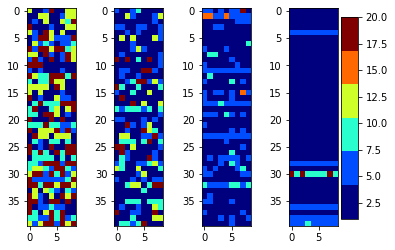

In [85]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
im2 = ax1.imshow(lat[:40], cmap=cmap)
im2 = ax2.imshow(lat[40:80], cmap=cmap)
im2 = ax3.imshow(lat[80:120], cmap=cmap)
im2 = ax4.imshow(lat[120:160], cmap=cmap)
cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
fig.colorbar(im2, cax=cbar_ax)

plt.show()